In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [2]:
data=np.array([[1, 1226800], [2, 926891], [3, 782725], [4, 1023038], [5, 1126293], [6, 692565], [7, 1165880], [8, 1207156], [9, 1129954], [10, 745100], [11, 1059346], [12, 1168555], [13, 1317458], [14, 528045], [15, 1220238], [16, 874557], [17, 1033389], [18, 1034165], [19, 812094], [20, 1351419], [21, 801822], [22, 1044266], [23, 722871], [24, 742100], [25, 839471], [26, 1201199], [27, 796265], [28, 953887], [29, 1124602], [30, 1070181], [31, 1160366], [32, 1131150], [33, 1151813], [34, 1065316], [35, 914800], [36, 1093034], [37, 937898], [38, 991612], [39, 865649], [40, 990565], [41, 965414], [42, 949248], [43, 1168905], [44, 593112], [45, 1156922], [46, 870095], [47, 1023262], [48, 788327], [49, 543605], [50, 510786], [51, 734714], [52, 1133025], [53, 1461091], [54, 635481], [55, 1104107], [56, 844960], [57, 1271967], [58, 574319], [59, 1063900], [60, 724737]])

In [105]:
df=pd.DataFrame(data=data[:,1])

In [114]:
df['date']=pd.to_datetime(pd.date_range('2011-01', periods=60, freq='M'))

In [106]:
df.head()

,0
0,1226800
1,926891
2,782725
3,1023038
4,1126293


In [6]:
del df[0]

In [96]:
df=df.set_index('date')

In [97]:
df.head()

,1
date,
2011-01-31,1226800
2011-02-28,926891
2011-03-31,782725
2011-04-30,1023038
2011-05-31,1126293


In [7]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [18]:
seriesDf = df[:]

In [46]:
seriesDf.tail()

,1,date
55,844960,2015-08-31
56,1271967,2015-09-30
57,574319,2015-10-31
58,1063900,2015-11-30
59,724737,2015-12-31


In [20]:
seriesDf=seriesDf.reset_index()

In [21]:
seriesDf.head()

,index,1,date
0,0,1226800,2011-01-31
1,1,926891,2011-02-28
2,2,782725,2011-03-31
3,3,1023038,2011-04-30
4,4,1126293,2011-05-31


In [25]:
del seriesDf['index']

In [26]:
countSeries = seriesDf.groupby(['date']).sum()

In [27]:
countSeries.head()

,1
date,
2011-01-31,1226800
2011-02-28,926891
2011-03-31,782725
2011-04-30,1023038
2011-05-31,1126293


In [98]:
series = df.iloc[:, 0]

In [31]:
a=series[:]

In [99]:
series=series.apply(float)

In [100]:
series

date
2011-01-31    1226800.0
2011-02-28     926891.0
2011-03-31     782725.0
2011-04-30    1023038.0
2011-05-31    1126293.0
2011-06-30     692565.0
2011-07-31    1165880.0
2011-08-31    1207156.0
2011-09-30    1129954.0
2011-10-31     745100.0
2011-11-30    1059346.0
2011-12-31    1168555.0
2012-01-31    1317458.0
2012-02-29     528045.0
2012-03-31    1220238.0
2012-04-30     874557.0
2012-05-31    1033389.0
2012-06-30    1034165.0
2012-07-31     812094.0
2012-08-31    1351419.0
2012-09-30     801822.0
2012-10-31    1044266.0
2012-11-30     722871.0
2012-12-31     742100.0
2013-01-31     839471.0
2013-02-28    1201199.0
2013-03-31     796265.0
2013-04-30     953887.0
2013-05-31    1124602.0
2013-06-30    1070181.0
2013-07-31    1160366.0
2013-08-31    1131150.0
2013-09-30    1151813.0
2013-10-31    1065316.0
2013-11-30     914800.0
2013-12-31    1093034.0
2014-01-31     937898.0
2014-02-28     991612.0
2014-03-31     865649.0
2014-04-30     990565.0
2014-05-31     965414.0
2014-06-30 

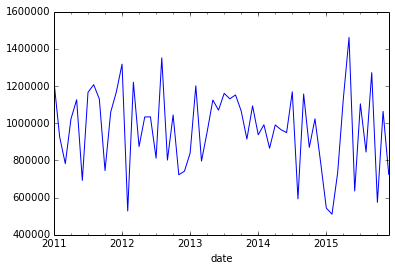

In [101]:
series.plot()

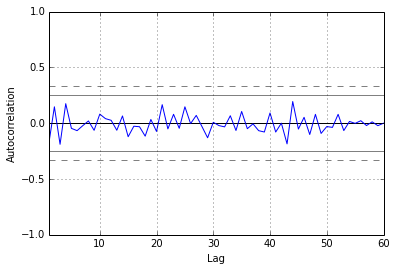

In [48]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(series)

In [49]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import datetime

In [102]:
model = ARIMA(series, order=(8,0,1))

In [103]:
model_fit = model.fit()

                              ARMA Model Results                              
Dep. Variable:                      1   No. Observations:                   60
Model:                     ARMA(8, 1)   Log Likelihood                -818.821
Method:                       css-mle   S.D. of innovations         203507.013
Date:                Thu, 07 Dec 2017   AIC                           1659.642
Time:                        08:10:43   BIC                           1682.680
Sample:                    01-31-2011   HQIC                          1668.653
                         - 12-31-2015                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        9.69e+05   2.38e+04     40.762      0.000    9.22e+05    1.02e+06
ar.L1.1       -0.7381      0.592     -1.246      0.218      -1.899       0.423
ar.L2.1        0.0402      0.183      0.220      0.8

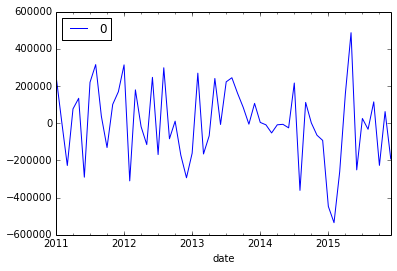

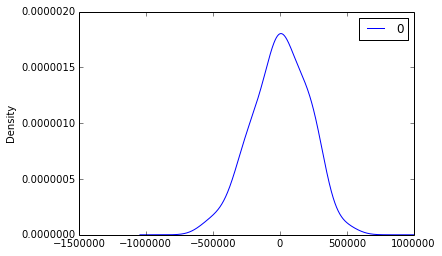

                   0
count      60.000000
mean     1676.192188
std    206103.595529
min   -534871.483195
25%   -138381.273617
50%     -1815.690745
75%    159183.195062
max    486537.376592


In [104]:
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [78]:
X = a.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

predicted=1008602.581732, expected=990565.000000
predicted=956912.079599, expected=965414.000000
predicted=933153.986231, expected=949248.000000
predicted=931540.524641, expected=1168905.000000
predicted=938080.111375, expected=593112.000000
predicted=1062423.149879, expected=1156922.000000
predicted=890006.295548, expected=870095.000000
predicted=1003534.579660, expected=1023262.000000
predicted=859821.857006, expected=788327.000000


/Library/Python/2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=961095.777343, expected=543605.000000
predicted=1043114.357867, expected=510786.000000
predicted=777025.349222, expected=734714.000000
predicted=667590.931102, expected=1133025.000000
predicted=604947.027137, expected=1461091.000000


/Library/Python/2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=825047.393793, expected=635481.000000
predicted=785937.898331, expected=1104107.000000
predicted=902760.615060, expected=844960.000000
predicted=1137957.152951, expected=1271967.000000
predicted=1008402.376879, expected=574319.000000
predicted=1008810.597796, expected=1063900.000000
predicted=845230.652960, expected=724737.000000
Test MSE: 93540517380.933


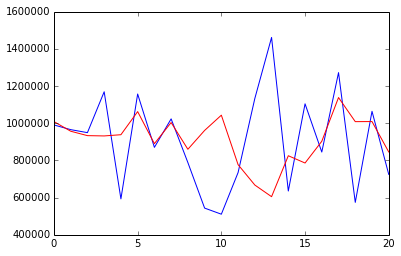

In [79]:
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [85]:
X[size:len(X)]

array([  990565.,   965414.,   949248.,  1168905.,   593112.,  1156922.,
         870095.,  1023262.,   788327.,   543605.,   510786.,   734714.,
        1133025.,  1461091.,   635481.,  1104107.,   844960.,  1271967.,
         574319.,  1063900.,   724737.])

In [83]:
test=pd.to_datetime(pd.date_range('2016-01', periods=12, freq='M'))

In [88]:
test

DatetimeIndex(['2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31'],
              dtype='datetime64[ns]', freq='M')

In [89]:
X = a.values
#size = int(len(X) * 0.66)
#train, test = X[0:size], X[size:len(X)]
train=X[:]
history = [x for x in train]
predictions = list()

2016-01-31 00:00:00 [ 1053572.32880851]
2016-02-29 00:00:00 [ 1047377.40539722]
2016-03-31 00:00:00 [ 1053323.5554696]
2016-04-30 00:00:00 [ 1048017.27682439]
2016-05-31 00:00:00 [ 1053572.32880851]
2016-06-30 00:00:00 [ 1046320.52064424]
2016-07-31 00:00:00 [ 1049225.5895819]
2016-08-31 00:00:00 [ 1046265.25660919]


/Library/Python/2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2016-09-30 00:00:00 [ 1051235.88780989]
2016-10-31 00:00:00 [ 1052755.75565769]
2016-11-30 00:00:00 [ 1046493.69707016]
2016-12-31 00:00:00 [ 1047424.99946116]
Test MSE: 93540517380.933


/Library/Python/2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


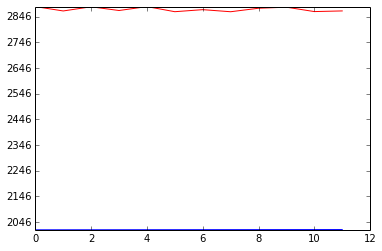

In [90]:
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    print yhat
    #history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
#error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [93]:
1053572.000/1563178.000

0.673993620688111